W pierwszej kolejności pobieram dane z Kaggle odnoszące się do danych marketingowych 
https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset

In [1]:
import pandas as pd
import numpy as np
import os

data_path = r"E:\page_ds\tweaking_the_response_results"

dane = pd.read_csv(os.path.join(data_path, "bank-additional-full.csv"), sep=';')

In [ ]:
# przyglądnę się danym i ewentualnie zredukuję listę zmiennych
from dataprep.eda import create_report

report = create_report(dane, title='EDA dla kampanii marketingowej')
# przenoszę do przeglądarki
report.save(os.path.join(data_path, "EDA_dla_kampanii.html"))
report.show_browser()
report.show()


In [6]:
display(dane)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#### Akcje:
1. kodujemy _pdays_ na wartości 1 - gdy =999, 0 w przeciwnym wypadku
2. OHE dla zmiennych tekstowych
3. wywalam zmienne silnie skorelowane - emp.var.rate, euribor3m
4. month - wydaje się popsuta
5. duration - jest sugestia żeby nie dawac do modelu - zbyt silna zależnośc do y (brak kontaktu -> = 0 )
6. dokonuję próbkowania próbując zbalansować próbkę danych, która jest dość mocno niezbalansowana 

In [2]:
#dane numeryczne
dane._get_numeric_data().columns.difference(['pdays','emp.var.rate','euribor3m']).tolist()


['age',
 'campaign',
 'cons.conf.idx',
 'cons.price.idx',
 'duration',
 'nr.employed',
 'previous']

In [4]:
dane.select_dtypes(include=['object']).columns.difference(['y']).tolist()

['contact',
 'day_of_week',
 'default',
 'education',
 'housing',
 'job',
 'loan',
 'marital',
 'month',
 'poutcome']

In [ ]:
# dodanie zmiennych kategorycznych, robiÃ„Â™ to w pÃ„Â™tli ale moÃ…Â¼na skorzystaÃ„Â‡ rÃƒÂ³wniez z metody OneHotEncoding

cat_vars=dane.select_dtypes(include=['object']).columns.difference(['y']).tolist()
for var in cat_vars:
    cat_list = pd.get_dummies(dane[var], prefix=var)
    data1 = dane.join(cat_list)
    dane = data1


In [14]:
# mamy rozszerzony zbiór danych, trzeba to połączyć i oczyścić 
data_vars = dane.columns.difference(cat_vars).tolist()
#to_keep=[i for i in data_vars if i not in cat_vars]
data_final=dane[data_vars]
data_final.columns.values

array(['age', 'campaign', 'cons.conf.idx', 'cons.price.idx',
       'contact_cellular', 'contact_telephone', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'default_no', 'default_unknown', 'default_yes',
       'duration', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'emp.var.rate',
       'euribor3m', 'housing_no', 'housing_unknown', 'housing_yes',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown', 'loan_no',
       'loan_unknown', 'loan_yes', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'month_apr', 'month_aug',
       'month_dec', '

In [25]:
display(data_final)

,age,campaign,cons.conf.idx,cons.price.idx,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,...,month_nov,month_oct,month_sep,nr.employed,pdays,poutcome_failure,poutcome_nonexistent,poutcome_success,previous,y
0,56,1,-36.4,93.994,0,1,0,1,0,0,...,0,0,0,5191.0,999,0,1,0,0,no
1,57,1,-36.4,93.994,0,1,0,1,0,0,...,0,0,0,5191.0,999,0,1,0,0,no
2,37,1,-36.4,93.994,0,1,0,1,0,0,...,0,0,0,5191.0,999,0,1,0,0,no
3,40,1,-36.4,93.994,0,1,0,1,0,0,...,0,0,0,5191.0,999,0,1,0,0,no
4,56,1,-36.4,93.994,0,1,0,1,0,0,...,0,0,0,5191.0,999,0,1,0,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,-50.8,94.767,1,0,1,0,0,0,...,1,0,0,4963.6,999,0,1,0,0,yes
41184,46,1,-50.8,94.767,1,0,1,0,0,0,...,1,0,0,4963.6,999,0,1,0,0,no
41185,56,2,-50.8,94.767,1,0,1,0,0,0,...,1,0,0,4963.6,999,0,1,0,0,no
41186,44,1,-50.8,94.767,1,0,1,0,0,0,...,1,0,0,4963.6,999,0,1,0,0,yes


In [45]:
# kodowanie zmiennej celu na zera i jedynku
data_final = pd.DataFrame(data_final)
data_final.loc[:,'y'] = data_final['y'].replace(['no','yes'], [0,1]).tolist()

In [46]:
display(data_final)

,age,campaign,cons.conf.idx,cons.price.idx,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,...,month_nov,month_oct,month_sep,nr.employed,pdays,poutcome_failure,poutcome_nonexistent,poutcome_success,previous,y
0,56,1,-36.4,93.994,0,1,0,1,0,0,...,0,0,0,5191.0,999,0,1,0,0,0
1,57,1,-36.4,93.994,0,1,0,1,0,0,...,0,0,0,5191.0,999,0,1,0,0,0
2,37,1,-36.4,93.994,0,1,0,1,0,0,...,0,0,0,5191.0,999,0,1,0,0,0
3,40,1,-36.4,93.994,0,1,0,1,0,0,...,0,0,0,5191.0,999,0,1,0,0,0
4,56,1,-36.4,93.994,0,1,0,1,0,0,...,0,0,0,5191.0,999,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,-50.8,94.767,1,0,1,0,0,0,...,1,0,0,4963.6,999,0,1,0,0,1
41184,46,1,-50.8,94.767,1,0,1,0,0,0,...,1,0,0,4963.6,999,0,1,0,0,0
41185,56,2,-50.8,94.767,1,0,1,0,0,0,...,1,0,0,4963.6,999,0,1,0,0,0
41186,44,1,-50.8,94.767,1,0,1,0,0,0,...,1,0,0,4963.6,999,0,1,0,0,1


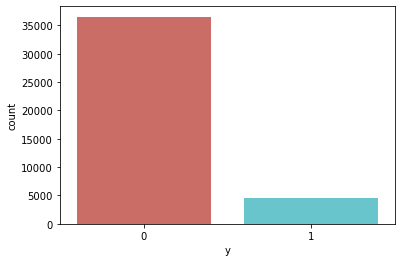

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x= 'y', data=data_final,  palette='hls')
plt.show()


##### SMOTE
Więcej informacji można znaleźć na stronie https://imbalanced-learn.org/stable/over_sampling.html#smote-adasyn


In [58]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

#from sklearn.base import _ClassNamePrefixFeaturesOutMixin

X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

os = SMOTE(random_state=128262)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=128262)
columns = X_train.columns

os_data_X, os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])


In [60]:

# sprawdzenie czy dane zostały zbalansowane
print("Długość zbioru nadpróbkowego:",len(os_data_X))
print("Liczba pozytywnych targetów:",len(os_data_y[os_data_y['y']==1]))
print("Liczba negatywnych targetów:",len(os_data_y[os_data_y['y']==0]))
print("Proporcja pozytywnych targetów:",len(os_data_y[os_data_y['y']==1])/len(os_data_X))
print("Proporcja negatywnych targetów:",len(os_data_y[os_data_y['y']==0])/len(os_data_X))

Długość zbioru nadpróbkowego: 58574
Liczba pozytywnych targetów: 29287
Liczba negatywnych targetów: 29287
Proporcja pozytywnych targetów: 0.5
Proporcja negatywnych targetów: 0.5


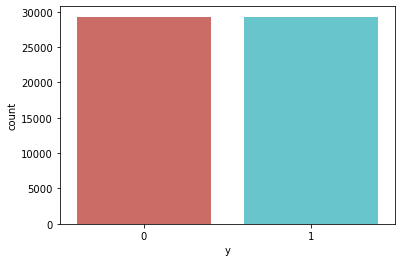

In [61]:
sns.countplot(x= 'y', data=os_data_y,  palette='hls')
plt.show()

#### Bubujemy model z losowo dobranymi hiperparametramiimport xgboost as xgb

Dokładność dla zbioru walidacyjnego: 0.9085
Dokładność dla zbioru traningowego oryginalnego: 0.9262
Dokładność dla zbioru traningowego zbalansowanego: 0.9581
Wartość parametru Gini na zbiorze walidacyjnym to: 0.8842
Wartość parametru Gini na zbiorze treningowym to: 0.9147
Wartość parametru Gini na zbiorze zbalansowanym to: 0.9890

ROC Curve

Confusion Matrix


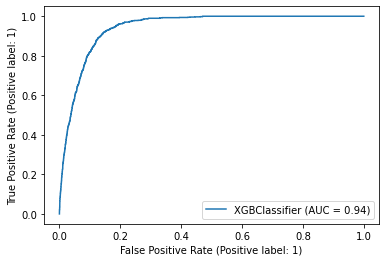

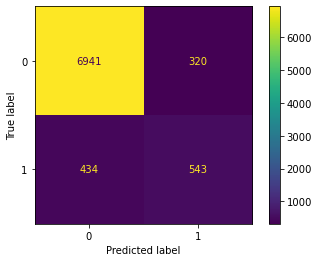

In [64]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

xgb_clf = xgb.XGBClassifier(max_depth=3,
                            n_estimators=100,
                            objective='binary:logistic',
                            booster='gbtree',
                            n_jobs=-1,
                            random_state=1)

# uczymy model, korzystamy z API sklearn
xgb_clf.fit(os_data_X, os_data_y)

# przeliczamy skoringi na zbiorze testowym aby sprawdzić jakość modelu w rozumieniu interesujących mnie miar
y_hat = xgb_clf.predict(X_test)

auc_val = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1])
auc_train = roc_auc_score(y_train, xgb_clf.predict_proba(X_train)[:, 1])
auc_train_os = roc_auc_score(os_data_y, xgb_clf.predict_proba(os_data_X)[:, 1])


print("Dokładność dla zbioru walidacyjnego: {0:.4f}".format(accuracy_score(y_test, y_hat)))
print("Dokładność dla zbioru traningowego oryginalnego: {0:.4f}".format(accuracy_score(y_train, xgb_clf.predict(X_train))))
print("Dokładność dla zbioru traningowego zbalansowanego: {0:.4f}".format(accuracy_score(os_data_y, xgb_clf.predict(os_data_X))))


print("Wartość parametru Gini na zbiorze walidacyjnym to: {0:.4f}".format(2*auc_val-1)) # Gini = 2*AUC-1
print("Wartość parametru Gini na zbiorze treningowym to: {0:.4f}".format(2*auc_train-1)) # Gini = 2*AUC-1
print("Wartość parametru Gini na zbiorze zbalansowanym to: {0:.4f}".format(2*auc_train_os-1)) # Gini = 2*AUC-1


print("\nROC Curve")
print(RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test))
#RocCurveDisplay.from_estimator(xgb_clf, X_test, y_test)
#plt.savefig(r"E:\page_ds\XGBoost_step_by_step\foto\2_ROC_cur_clf.png", format="png" , dpi=300, facecolor="White")

print("\nConfusion Matrix")
cm = confusion_matrix(y_test, y_hat, labels=xgb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=xgb_clf.classes_)
print(disp.plot())
#wyk = disp.plot()
#plt.savefig(r"E:\page_ds\XGBoost_step_by_step\foto\1_conf_matrix_clf.png", format="png" , dpi=300, facecolor="White")
#lt.show()


